### 지하철 승하차 데이터를 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949', index_col=3, skiprows=1)
data = df.replace(',', '', regex=True).iloc[:,3:-1]
data = data.astype('int32')
data.head(3)

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0


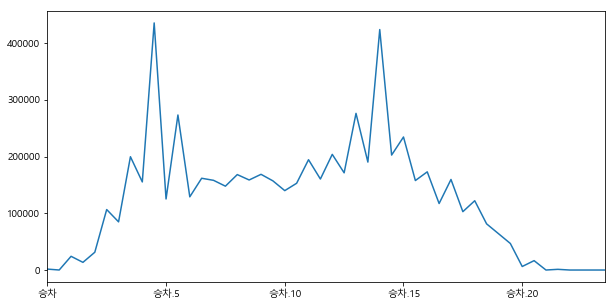

In [22]:
# 서울역 승하차 인원을 그래프를 그리자
plt.rc('font', family='Malgun Gothic')
station_seoul = np.sum(data.loc['서울역'], axis=0)
station_seoul.T.plot(figsize=(10, 5))
plt.show()

In [7]:
station_seoul.head()

승차       1623
하차         35
승차.1    24163
하차.1    13524
승차.2    31344
dtype: int64

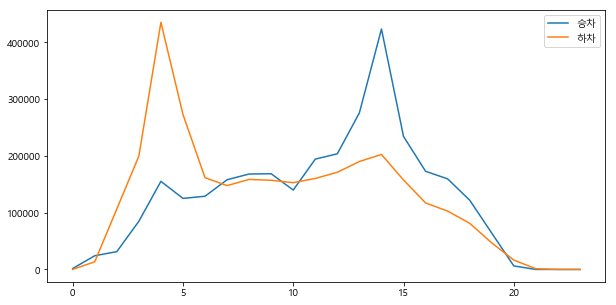

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 5))
plt.plot(station_seoul[::2].values, label='승차')
plt.plot(station_seoul[1::2].values, label='하차')
plt.legend()
plt.show()

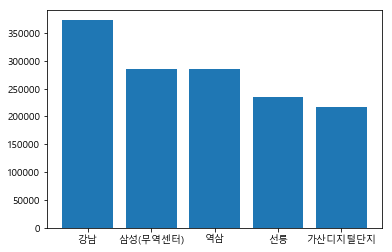

pandas.core.indexes.base.Index

In [18]:
# 아침 9~10시 사이에 하차인원이 가장 많은 역 5개를 bar로 그리시오
하차 = data.iloc[:,11]
y = 하차.sort_values(ascending=False)[:5]
plt.bar(y.index, y)
plt.show()

In [10]:
# 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으시오.
승차 = np.sum(data.iloc[:, ::2], axis=1)
하차 = np.sum(data.iloc[:,1 ::2], axis=1)
비율 = 하차 / 승차

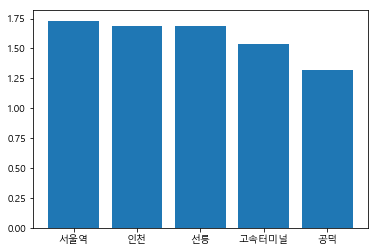

In [11]:
y = 비율.sort_values(ascending=False)[:5]
plt.bar(y.index, y)
plt.show()

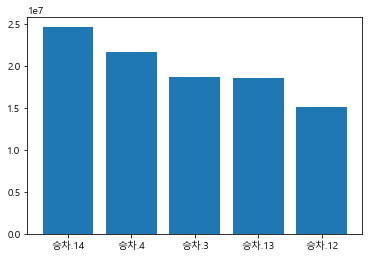

In [15]:
# 하루 중 승차 인원이 가장 많은 시간은 언제입니까 (예 1시~2시)
승차 = np.sum(data.iloc[:, ::2], axis=0)
y = 승차.sort_values(ascending=False)[:5]
plt.bar(y.index, y)
plt.show()

In [74]:
# 유임하차에 비해 무임하차 비율이 가장 높은 역 5개를 찾아 Bar를 그리시오
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=2, encoding='cp949', index_col=3, skiprows=0)
subway = df.iloc[:, 3:-1]
subway = subway.replace(',', '', regex=True)
subway = subway.astype('int')

In [75]:
subway.head()

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016
종각,1204910,1151371,176083,164915
종로3가,699000,647664,408682,382809
종로5가,561662,578374,307515,295535


In [76]:
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
비율 = 무임하차 / 유임하차

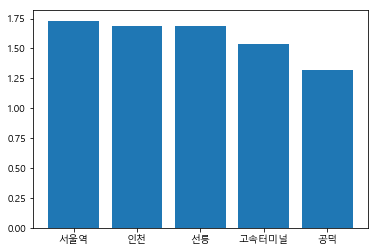

In [91]:
y = 비율.sort_values(ascending=False)[:5]
plt.bar(y.index, y)
plt.show()